## Dataset
- Dataset : `sonar.all-data.csv`
- The dataset contains the sonar frequencies (under water) to detect if an object detected is a rock or sea mine

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sonar.all-data.csv', header= None)

In [3]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [4]:
def colname(df):
    cols= {}
    for i,x in enumerate(df.columns):
        cols[i] = ('Freq_' + str(x))
    cols[60] = 'Label'
    return cols
    

In [5]:
df = df.rename(columns = colname(df))

In [6]:
df.isna().any().sum()

np.int64(0)

In [7]:
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [9]:
X = df.drop('Label', axis = 1)
y = df['Label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
model = KNeighborsClassifier()
scaler = StandardScaler()

In [12]:
pipe_steps = [('scaler', scaler),('model', model)]

In [13]:
k_values = list(range(1,31))
metric = ['minkowski', 'euclidean']
grid_params = {'model__n_neighbors': k_values, 'model__metric':metric}

In [14]:
pipeline = Pipeline(steps = pipe_steps)

In [15]:
grid_model = GridSearchCV(estimator= pipeline,
                          param_grid= grid_params, 
                          scoring = 'accuracy',
                          cv = 10, verbose = 1 )

In [16]:
grid_model.fit(X, y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__metric': ['minkowski', 'euclidean'],
                         'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11, 12, 13, 14, 15, 16, 17, 18,
                                                19, 20, 21, 22, 23, 24, 25, 26,
                                                27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [17]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=1))])

In [18]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [19]:
y_test_pred = grid_model.predict(X_test)

In [20]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           M       1.00      1.00      1.00        21
           R       1.00      1.00      1.00        21

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



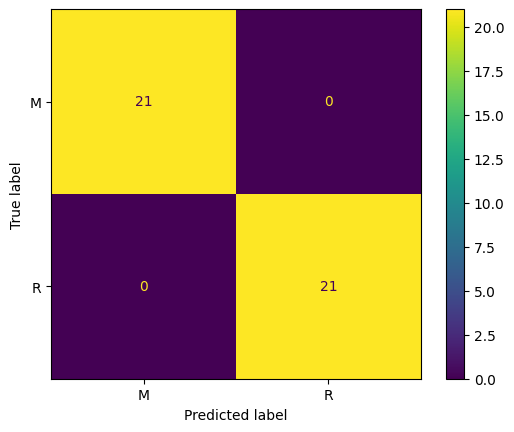

In [21]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels= grid_model.classes_).plot()

In [22]:
y_train_pred = grid_model.predict(X_train)

In [23]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           M       1.00      1.00      1.00        90
           R       1.00      1.00      1.00        76

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166



#### What are 5 highly correlated features with Labels

In [24]:
df['Target'] = df['Label'].map({'M': 1, 'R': 0})

In [25]:
df_new = df.drop('Label', axis = 1)

In [26]:
df_new.corr()['Target'].sort_values().tail(6)

Freq_44    0.339406
Freq_9     0.341142
Freq_48    0.351312
Freq_11    0.392245
Freq_10    0.432855
Target     1.000000
Name: Target, dtype: float64